In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [28]:
#récupération des données
data = yf.download('^TNX', start = '2019-01-01' , end = '2024-02-22')

[*********************100%%**********************]  1 of 1 completed


In [29]:
#Calcul de la moyenne mobile 40 jours
data['MM_40']= data['Close'].rolling(window=40).mean()

In [30]:
#Préparation de la régression linéaire
X = np.arange(len(data)).reshape(-1,1)
y = data['Close'].values.reshape(-1,1)

In [31]:
#Création de l'objet de régression linéaire
reg = LinearRegression().fit(X,y)

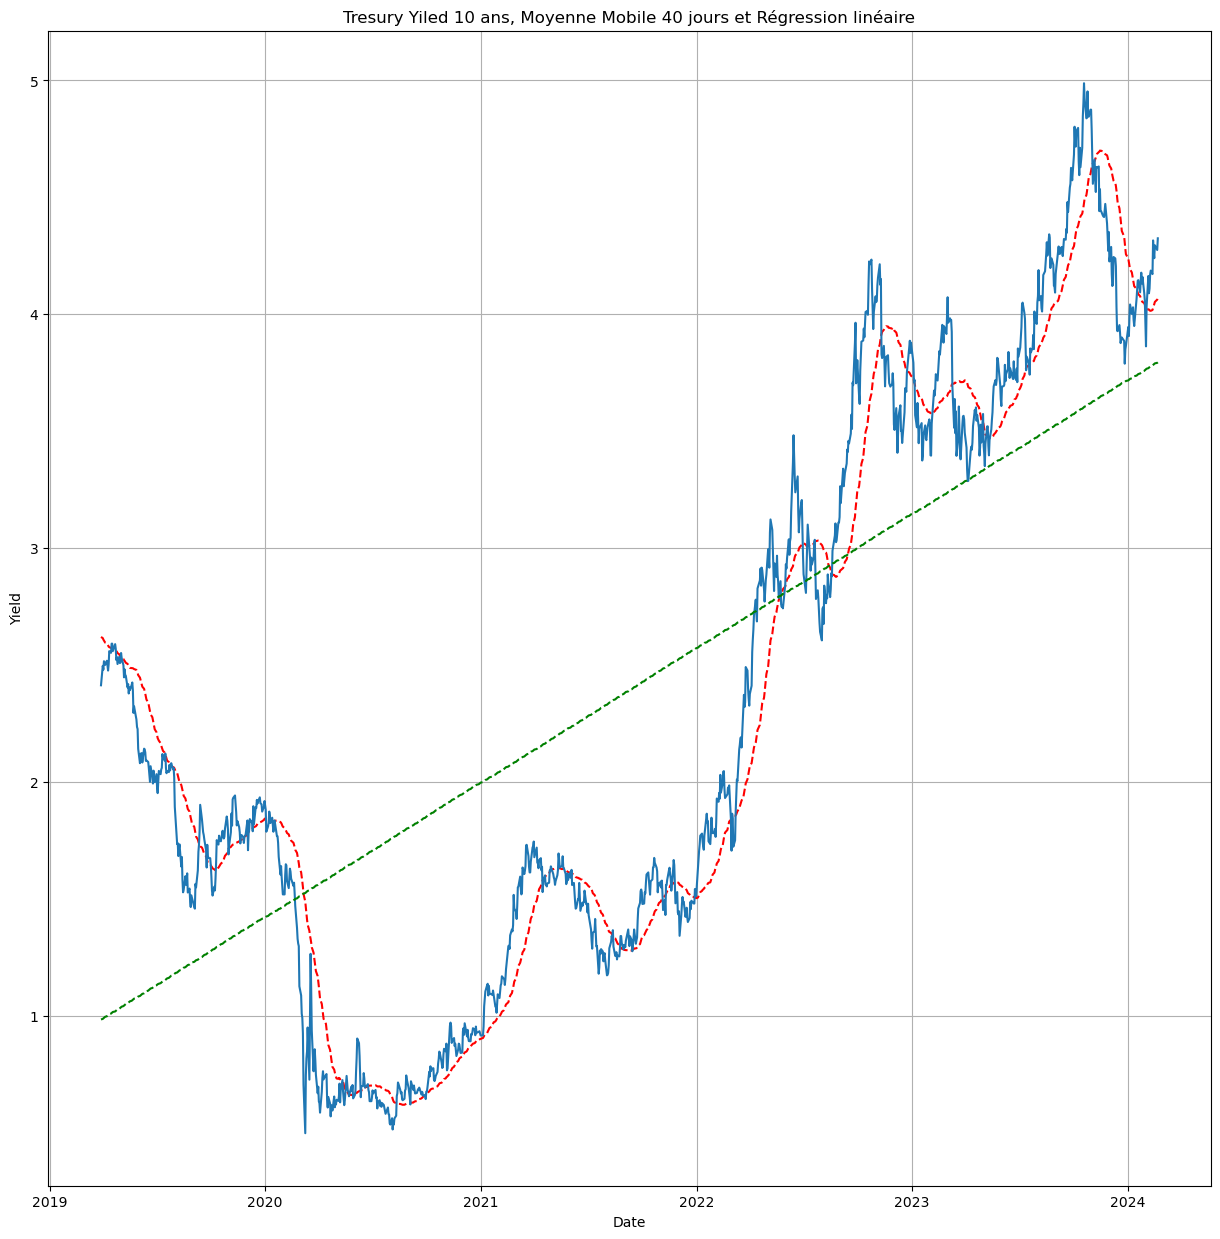

In [32]:
#Tracé du graphique en excluant les 60 premiers jours
plt.figure(figsize= (15,15))
plt.plot(data['MM_40'][60:] , label = 'Moyenne mobile 40 jours', linestyle ='--', color='red')
plt.plot(data['Close'][60:], label = 'Treasury Yield 10 ans')

#Tracé de la régression linéaire 
plt.plot(data.index[60:], reg.predict(X)[60:], label = 'Régression linéaire' , linestyle = '--' , color='green')

plt.title('Tresury Yiled 10 ans, Moyenne Mobile 40 jours et Régression linéaire')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.grid(True)
plt.show()

In [33]:
#Calcul des points d'inflexion

In [34]:
#récupération des données
data = yf.download('^TNX', start = '2019-01-01' , end = '2024-02-22')

[*********************100%%**********************]  1 of 1 completed


In [35]:
#Calcul de la moyenne mobile 40 jours
window = 5
data['SMA_40']= data['Close'].rolling(window=window).mean()

In [36]:
#Calcul des dérivées premières

sma_40 = data['SMA_40'].to_numpy()
diff1 = np.diff(sma_40, n=1)

In [37]:
# identification des points d'inflexion

inflexion_points = np.where(np.diff(np.sign(diff1)))[0]

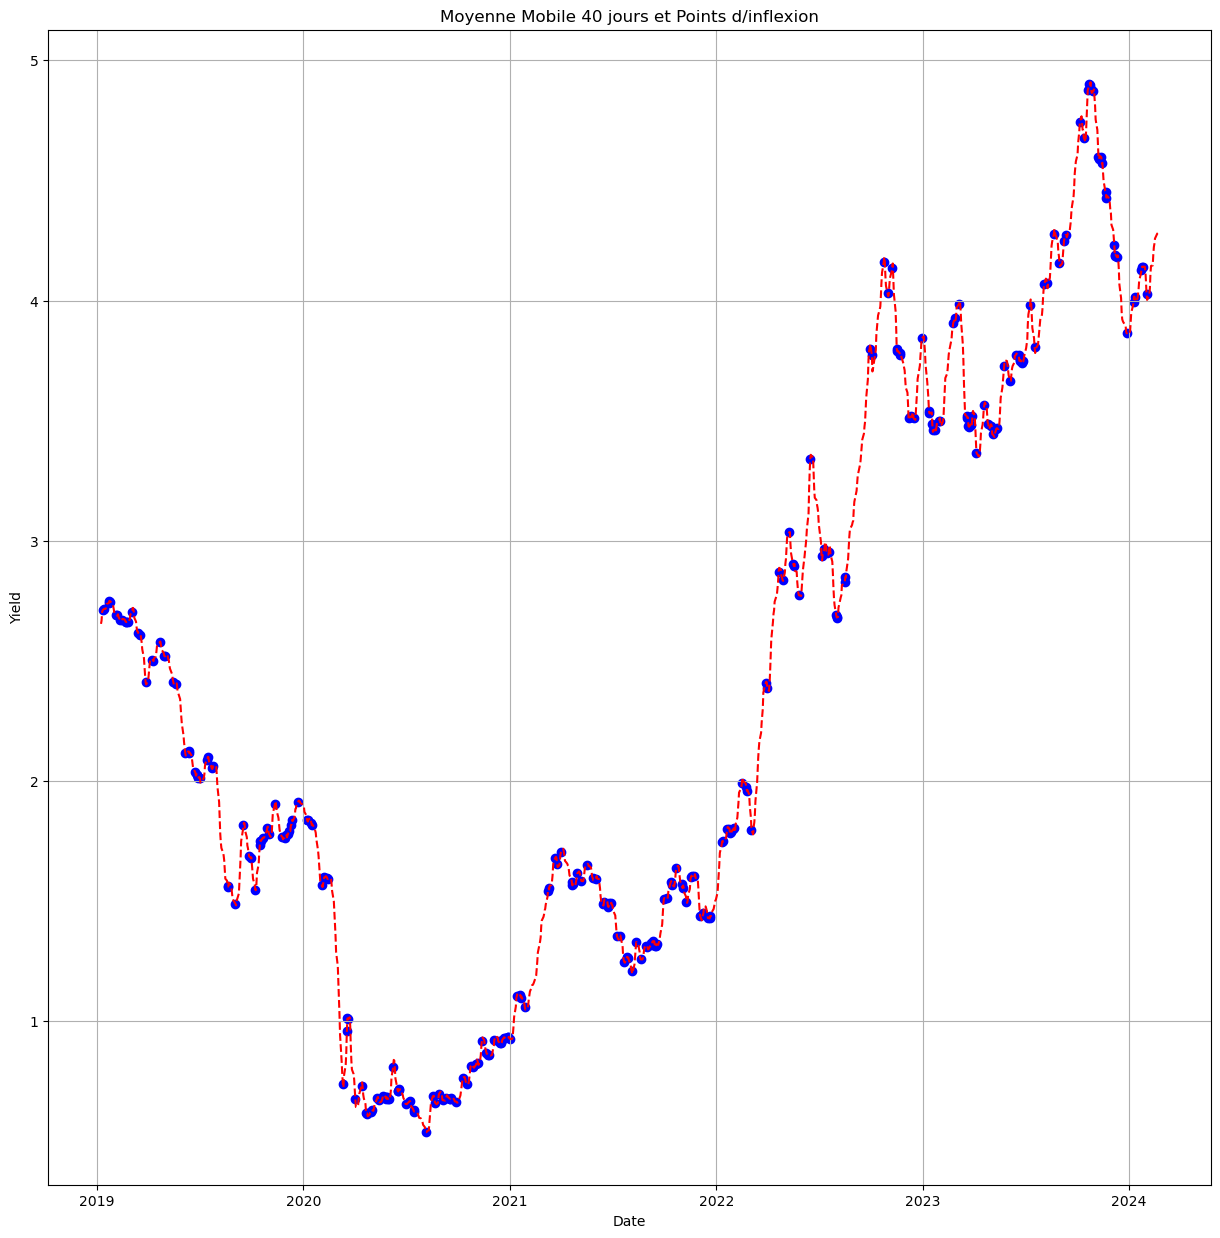

In [38]:
#Tracé du graphique 

plt.figure(figsize= (15,15))
plt.plot(data.index, data['SMA_40'], label ='Moyenne mobile 40 jours', linestyle = '--' , color='red')
plt.scatter(data.index[inflexion_points], data['SMA_40'].iloc[inflexion_points], label ='Points d/inflexion', marker = 'o' , color='blue')

plt.title('Moyenne Mobile 40 jours et Points d/inflexion')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.grid(True)
plt.show()

In [39]:
#Se situe-t-on sur un endroit concave ou convexe de la courbe ?

#achat : lorsque la dérivée seconde change de négative à positive entre deux points d'inflexion successifs
#vente : lorsque la dérivée seconde change de positive à négative entre deux points d'inflexion successifs

In [41]:
#Calcul des dérivées secondes

sma_40 = data['SMA_40'].to_numpy()
diff2 = np.diff(sma_40, n=2)

In [42]:
#Détection des points d'inflexion pour les signaux d'achat et de vente

buy_signal =[]
sell_signal = []

for i in range(1,len(inflexion_points)):
    if diff2[inflexion_points[i-1]]<0 and diff2[inflexion_points[i]]>0:
        buy_signal.append(inflexion_points[i])
    elif diff2[inflexion_points[i-1]]>0 and diff2[inflexion_points[i]]<0:
        sell_signal.append(inflexion_points[i])

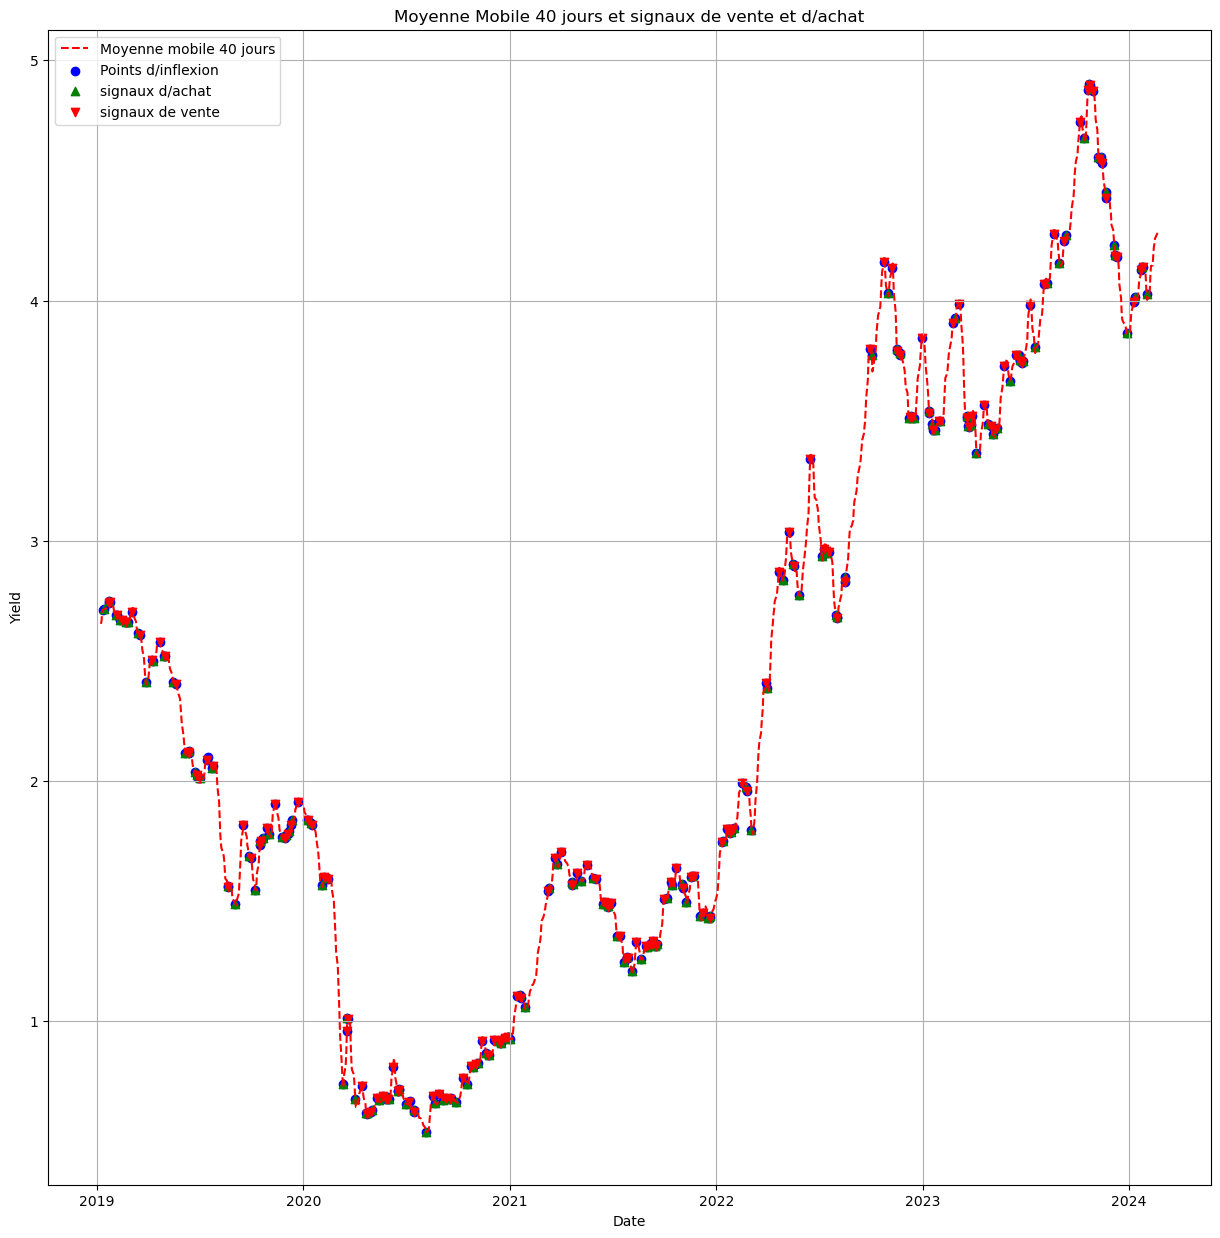

In [43]:
#Affichage des signaux de vente et d'achat sur le graphique
plt.figure(figsize= (15,15))
plt.plot(data.index, data['SMA_40'], label ='Moyenne mobile 40 jours', linestyle = '--' , color='red')
plt.scatter(data.index[inflexion_points], data['SMA_40'].iloc[inflexion_points], label ='Points d/inflexion', marker = 'o' , color='blue')
plt.scatter(data.index[buy_signal], data['SMA_40'].iloc[buy_signal], label ='signaux d/achat', marker = '^' , color='green')
plt.scatter(data.index[sell_signal], data['SMA_40'].iloc[sell_signal], label ='signaux de vente', marker = 'v' , color='red')


plt.title('Moyenne Mobile 40 jours et signaux de vente et d/achat')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#La prochaine étape est d'établir une stratégie d'arbitrage entre différents assets basé sur des signaux